<font color=red> İstatistikleri ve türleri ile 721 Pokemon içeren veri seti

#:Her pokemon için kimlik

Name:Her pokemonun a

Type 1:Her pokemonun bir türü vardır; bu, saldırılara karşı zayıflığı/dirençleri belirler.

Type 2:Bazı pokemonlar ikili tiptedir ve 2 tane bulunur.

Total:bundan sonra gelen tüm istatistiklerin toplamı, bir pokemonun ne kadar güçlü olduğuna dair genel bir kılavuz

HP:can puanı veya sağlık, bir pokemonun bayılmadan önce ne kadar hasara dayanabileceğini tanımlar

Attack:Normal saldırılar için temel değiştirici (örn. Scratch, Punch)

Defense:Normal saldırılara karşı temel hasar direnci

SP Atk:özel saldırı, özel saldırılar için temel değiştirici (örn. ateş patlaması, kabarcık ışın)

SP Def:özel saldırılara karşı temel hasar direnci

Speed:Her turda hangi Pokemonun ilk saldıracağını belirler

Legendary:efsanevi

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [254]:
# veriyi oku
df = pd.read_csv("Pokemon.csv",sep=",")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [255]:
# # bu sutunu sil
df = df.drop(columns="#")
df.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [256]:
# satır ve sutun sayısı
df.shape

(800, 12)

In [257]:
# tüm kolon isimleri
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [258]:
# eksik veriler
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [259]:
# eksik verilerin doldurulması
df["Type 2"] = df["Type 2"].fillna("None")
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [260]:
# Type 2 sutununda ki benzersiz değerler 
df["Type 2"].unique()

array(['Poison', 'None', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [261]:
# Type 2 sutununda ki benzersiz değerlerin sayısı
df["Type 2"].nunique()

19

In [262]:
# HP sutunundaki maksimum değer
df["HP"].max()

255

In [263]:
# HP sutunundaki maksimum değerin sahibi
df[df["HP"]==255]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,None,540,255,10,10,75,135,55,2,False


In [264]:
# HP sutunundaki minumum değer
df["HP"].min()

1

In [265]:
# HP sutunundaki minumum değerin sahibi
df[df["HP"]==1]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [266]:
# Name kolonuna göre gruplayıp HP değerlerini görmek
df.groupby("Name")["HP"].sum().sort_values(ascending=False)[:3]

Name
Blissey      255
Chansey      250
Wobbuffet    190
Name: HP, dtype: int64

In [267]:
# pikachu'nun özelliklerine bakmak
df[df["Name"]=="Pikachu"]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,Pikachu,Electric,None,320,35,55,40,50,50,90,1,False


In [268]:
# Type 1 sutununun benzersiz değerleri
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [269]:
# Type 1 sutununun benzersiz değerlerinin sayısı
df["Type 1"].nunique()

18

In [270]:
# Type 1 sutununun benzersiz değerlerinden kaç tane olduğu
df["Type 1"].value_counts()[:5]

Type 1
Water      112
Normal      98
Grass       70
Bug         69
Psychic     57
Name: count, dtype: int64

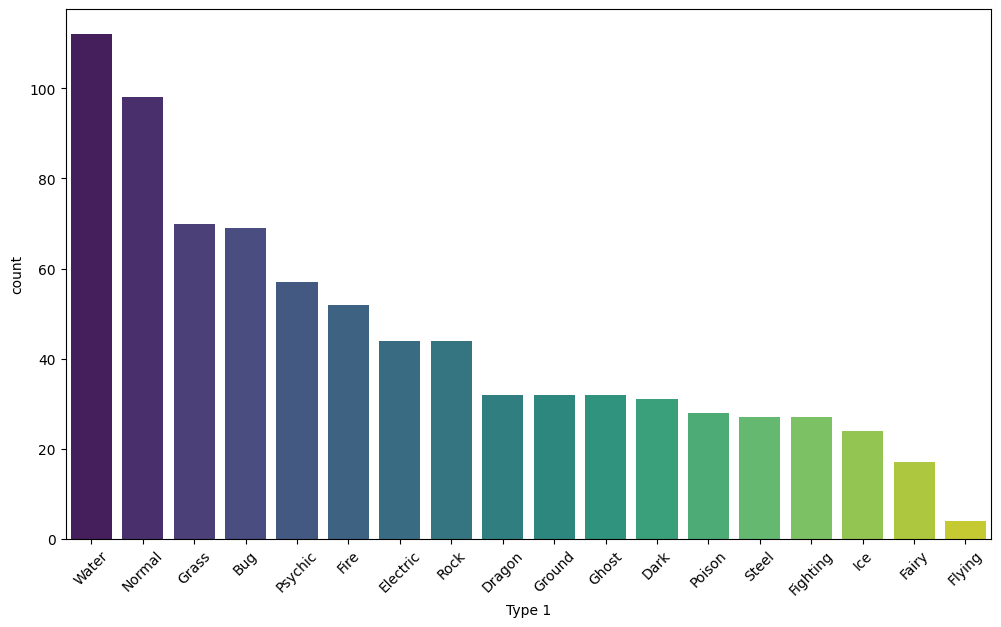

In [271]:
viz = df["Type 1"].value_counts()
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.tight_layout()
sns.barplot(viz,palette="viridis");

In [272]:

df["Type 2"].value_counts()[:5]

Type 2
None       386
Flying      97
Ground      35
Poison      34
Psychic     33
Name: count, dtype: int64

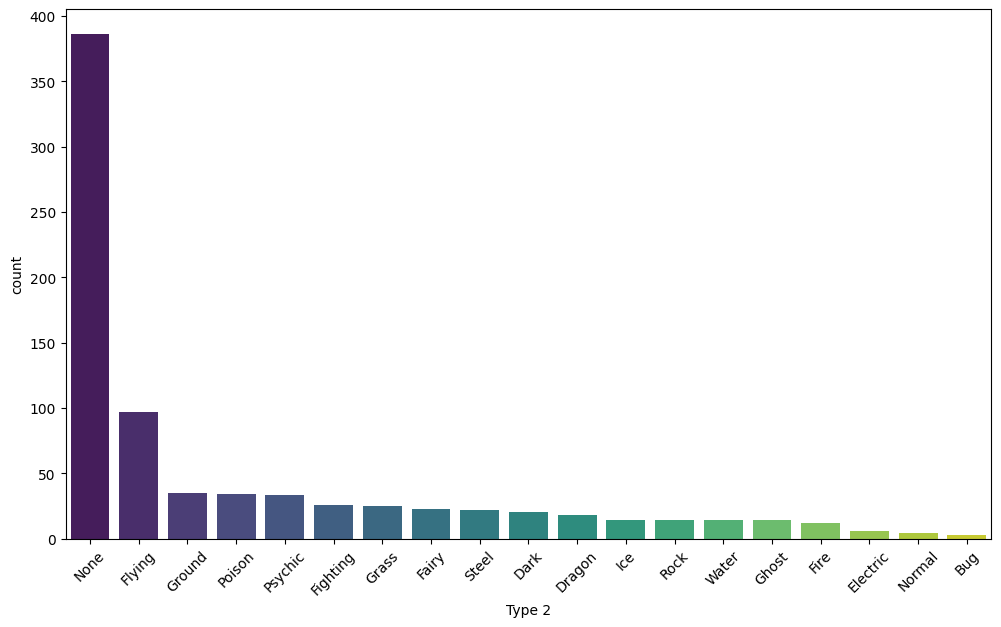

In [273]:
viz = df["Type 2"].value_counts()
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.tight_layout()
sns.barplot(viz,palette="viridis");

In [274]:
# sayısal sutunların Type 1 sutununa göre gruplanması ve ortalamalarının alınması
sayısal_sutunlar = df.select_dtypes(include="int")
kategori_sutun = df["Type 1"]
sayısal_sutunlar.groupby(kategori_sutun).mean().head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Type 1,,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727
Fairy,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647


In [275]:
sayısal_sutunlar = df.select_dtypes(include="int")
cor_matrix = sayısal_sutunlar.corr()
cor_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


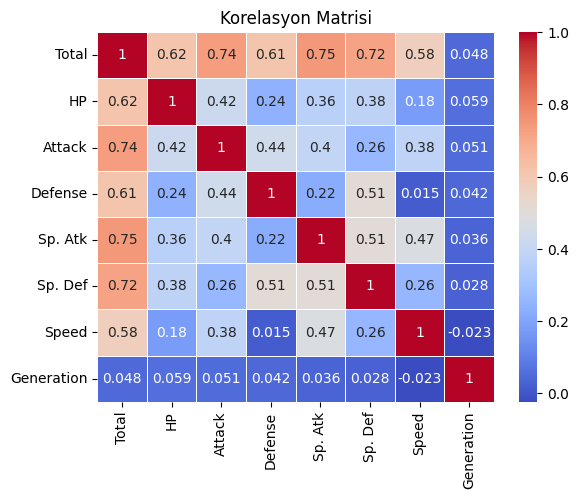

In [276]:
sns.heatmap(cor_matrix,annot=True,cmap="coolwarm",linewidths=.5)
plt.title("Korelasyon Matrisi");

In [277]:
# sayısal değişkenşleri bul
sayısal_değişkenler = df.select_dtypes(include="int")
sayısal_değişkenler.head(3)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1


In [278]:
# kesikli sayısal değişkenleri bul
kesikli_sayısal_değişkenler = [i for i in sayısal_değişkenler if len(df[i].unique())<25]
df[kesikli_sayısal_değişkenler].head(3)

,Generation
0,1
1,1
2,1


In [279]:
# sürekli sayısal değişkenleri bul
sürekli_sayısal_değişkenler = [i for i in sayısal_değişkenler if i not in kesikli_sayısal_değişkenler]
df[sürekli_sayısal_değişkenler].head(3)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80


Total sutununda aykırı değer bulunmamaktadır


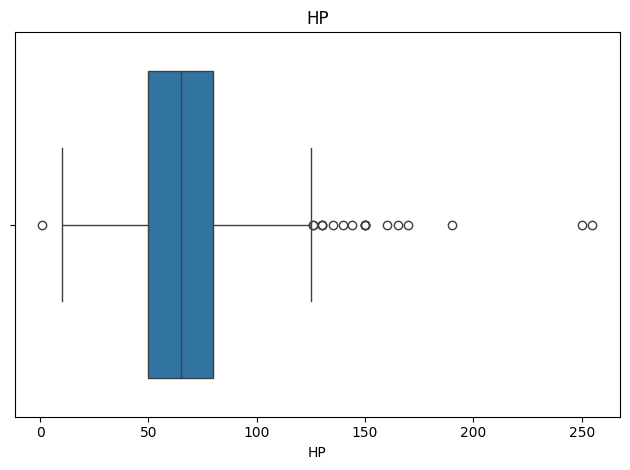

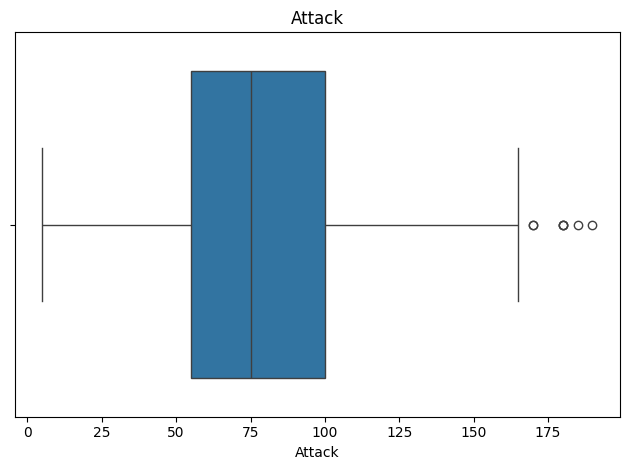

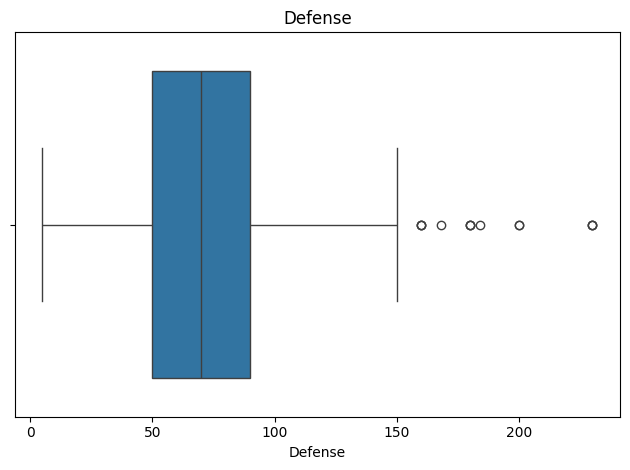

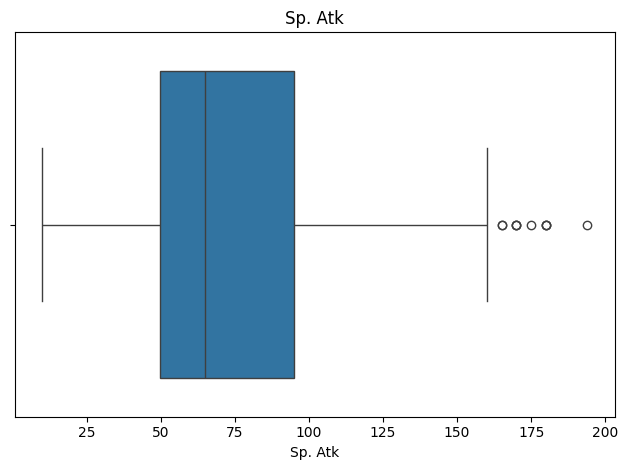

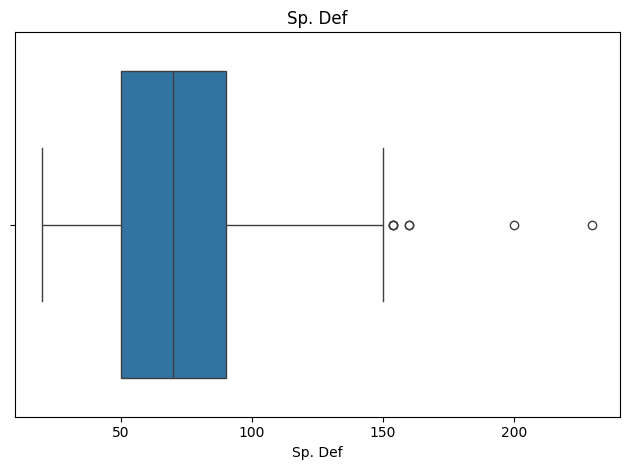

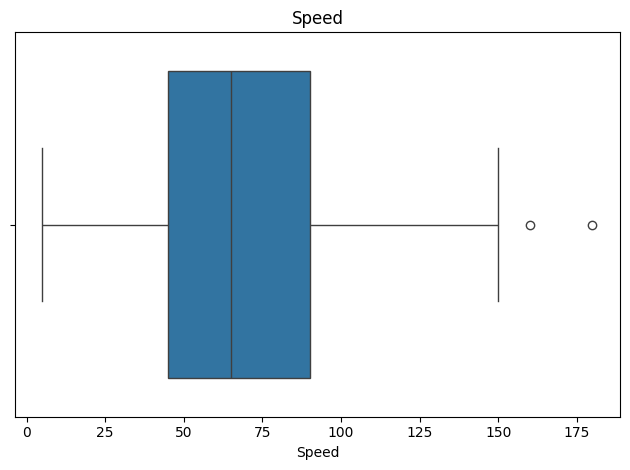

In [280]:
# sürekli sayısal değişkenlerin baxplot grafiğini çiz ve aykırı değerleri kontrol et
for col in sürekli_sayısal_değişkenler:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    if any((df[col] < lower_limit)|(df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    
    else:
        print(f"{col} sutununda aykırı değer bulunmamaktadır")

In [281]:
# sürekli sayısal değişkenlerin aykırı değerlerini min-max ile baskıla
def aykırı_değerleri_min_max_ile_doldur(df,sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sınır = Q1 - 1.5 * IQR
        üst_sınır = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sınır,col] = alt_sınır
        df.loc[df[col] > üst_sınır,col] = üst_sınır

    return df

seçilen_sutunlar = sürekli_sayısal_değişkenler
df = aykırı_değerleri_min_max_ile_doldur(df,seçilen_sutunlar)

In [282]:
# tekrar aykırı değerleri kontrol et
for col in sürekli_sayısal_değişkenler:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    if any((df[col] < lower_limit)|(df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    
    else:
        print(f"{col} sutununda aykırı değer bulunmamaktadır")

Total sutununda aykırı değer bulunmamaktadır
HP sutununda aykırı değer bulunmamaktadır
Attack sutununda aykırı değer bulunmamaktadır
Defense sutununda aykırı değer bulunmamaktadır
Sp. Atk sutununda aykırı değer bulunmamaktadır
Sp. Def sutununda aykırı değer bulunmamaktadır
Speed sutununda aykırı değer bulunmamaktadır


In [283]:
# değişkenerin veri tiplerini kontrol et
df.dtypes

Name           object
Type 1         object
Type 2         object
Total         float64
HP              int64
Attack        float64
Defense         int64
Sp. Atk       float64
Sp. Def         int64
Speed         float64
Generation      int64
Legendary        bool
dtype: object

In [284]:
# Legendary sutununda ki bool değerleri sayısala çevir
df["Legendary"] = df["Legendary"].replace({False:0,True:1})
df.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45,49.0,49,65.0,65,45.0,1,0
1,Ivysaur,Grass,Poison,405.0,60,62.0,63,80.0,80,60.0,1,0
2,Venusaur,Grass,Poison,525.0,80,82.0,83,100.0,100,80.0,1,0


In [295]:
x = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [298]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [299]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [301]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.3],
        'min_child_weight': [1, 3, 5]
        
        }
xgboost_cv = RandomizedSearchCV(classifier, parameters, cv = 3, n_jobs = -1, verbose = 2)
xgboost_cv.fit(x_train, y_train)
best = xgboost_cv.best_params_
best

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'subsample': 1.0,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0}

In [302]:
regressor = XGBClassifier(subsample=1,n_estimators=100,min_child_weight=1,max_depth=3,learning_rate=0.1,gamma=0)
regressor.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# test verisi

In [313]:
y_pred = regressor.predict(x_test)

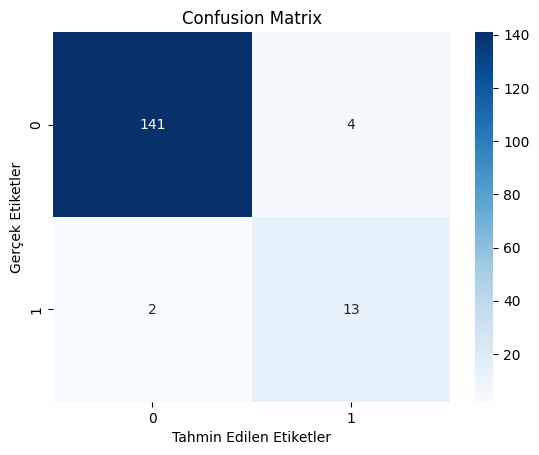

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()

In [316]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
f1_Score = f1_score(y_test,y_pred)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

precision: 0.7647058823529411
recall: 0.8666666666666667
accuracy: 0.9625
f1_Score: 0.8125


In [ ]:
# train verisi

In [318]:
y_pred_train = regressor.predict(x_train)

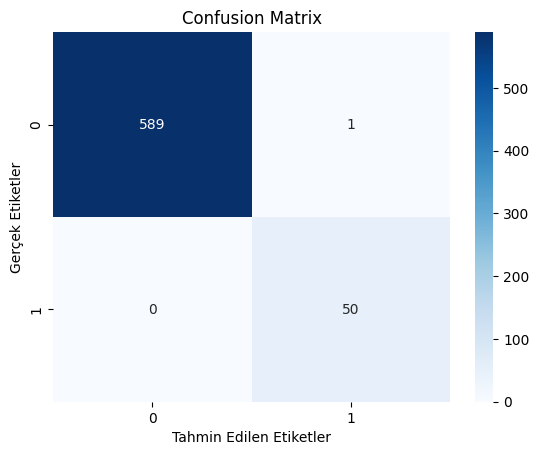

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()

In [323]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("Train verisi")
precision = precision_score(y_train,y_pred_train)
recall = recall_score(y_train,y_pred_train)
accuracy = accuracy_score(y_train,y_pred_train)
f1_Score = f1_score(y_train,y_pred_train)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

print("\n")

print("Test verisi")
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
f1_Score = f1_score(y_test,y_pred)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

Train verisi
precision: 0.9803921568627451
recall: 1.0
accuracy: 0.9984375
f1_Score: 0.9900990099009901


Test verisi
precision: 0.7647058823529411
recall: 0.8666666666666667
accuracy: 0.9625
f1_Score: 0.8125
